# 과제명 Predic_fucture_sales

# 목적

We are asking you to predict total sales for every product and store in the next month.

## 데이터 제공사 정보
1C COMPANY

Founded in 1991 1C Company specializes in development, distribution, publishing and support of mass-market software.

provided by one of the largest Russian software firms - 1C Company. 

In [1]:
from IPython.display import display

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [4]:
# 노트북에 플롯의 정적 이미지를 삽입할 수 있다. 커널/세션당 한 번만 실행하면 된다.
%matplotlib inline

## 변수 설명

File descriptions

  - sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
  - test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
  - sample_submission.csv - a sample submission file in the correct format.
  - items.csv - supplemental information about the items/products.
  - item_categories.csv  - supplemental information about the items categories.
  - shops.csv- supplemental information about the shops.

column descriptions

  -  ID - an Id that represents a (Shop, Item) tuple within the test set
  -  shop_id - unique identifier of a shop
  - item_id - unique identifier of a product
  - item_category_id - unique identifier of item category
  - item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
  - item_price - current price of an item
  - date - date in format dd/mm/yyyy
  - date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
  - item_name - name of item
  - shop_name - name of shop
  - item_category_name - name of item category

## 파일 읽어오기

In [5]:
sales_train = pd.read_csv('data/sales_train_v2.csv')
shops = pd.read_csv('data/shops.csv')
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')

## 데이터 훑어보자

### train set

In [6]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### shop 정보

In [7]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### 품목 분류

In [8]:
len(item_categories)

84

In [9]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


### 제품 목록

In [10]:
len(items)

22170

In [11]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


<div><img src = "http://pds25.egloos.com/pds/201602/15/86/b0000786_56c1bbe340932.png" height="142" width="142" align="left"> </div>
</p>
러시아어를 모른다

# 러시아어 -> 영어로 번역해서 보자

In [12]:
from googletrans import Translator

In [13]:
translator = Translator()

가게(?) 이름을 알아보자

In [14]:
i = 0
shops['shop_name_eng'] =""
for elmt in shops['shop_name']:
    shops.iloc[i,2] = translator.translate(elmt).text
    i += 1

In [15]:
shops.head()

,shop_name,shop_id,shop_name_eng
0,"!Якутск Орджоникидзе, 56 фран",0,"Yakutsk Ordzhonikidze, 56 francs"
1,"!Якутск ТЦ ""Центральный"" фран",1,"Yakutsk TC ""Central"" franc"
2,"Адыгея ТЦ ""Мега""",2,"Adygea Shopping Center ""Mega"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRK ""October-Kinomir"""
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky shopping center ""Volga Mall"""


In [16]:
#shops.to_csv('shops_eng.csv')

상품 카테고리가 어떻게 되었다는건가?

In [17]:
i = 0
item_categories['item_category_name_eng'] =""

for elmt in item_categories['item_category_name']:
    item_categories.iloc[i,2] = translator.translate(elmt).text
    i += 1

In [18]:
item_categories.head()

,item_category_name,item_category_id,item_category_name_eng
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP


In [19]:
#item_categories.to_csv('item_categories_eng.csv')

## 분석을 위해서 데이터 추가 Combining
### item category id 추가

In [20]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [21]:
sales_train = pd.merge(sales_train, items, how = 'left', on ='item_id')

In [22]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


### 상품 카테고리와 sales_train 머지 

In [23]:
sales_train = pd.merge(sales_train, item_categories, how = 'left', on ='item_category_id')

In [24]:
#러시아어 상품 카테고리명은 제거
sales_train = sales_train.drop('item_category_name', axis=1)

In [25]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name_eng
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Cinema - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD of branded production


In [26]:
sales_train.describe()[['item_price','item_cnt_day']]

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


In [27]:
sales_train.dtypes

date                       object
date_block_num              int64
shop_id                     int64
item_id                     int64
item_price                float64
item_cnt_day              float64
item_name                  object
item_category_id            int64
item_category_name_eng     object
dtype: object

### 일자로 인덱스로 설정하고 그 일자 범위와 일단위로 간격을 정한다.
### 이런 작업을 하고 싶어서 시계열 데이터로 만들었다.

In [28]:
#datetime으로 변경
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")

In [29]:
sales_train = sales_train.set_index('date', drop=True)

In [30]:
sales_train = sales_train.sort_index()

In [31]:
sales_train = sales_train.to_period('D')

index로 처리하다.

In [32]:
sales_train.index

PeriodIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
             '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
             '2013-01-01', '2013-01-01',
             ...
             '2015-10-31', '2015-10-31', '2015-10-31', '2015-10-31',
             '2015-10-31', '2015-10-31', '2015-10-31', '2015-10-31',
             '2015-10-31', '2015-10-31'],
            dtype='period[D]', name='date', length=2935849, freq='D')

In [33]:
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name_eng
date,,,,,,,,
2013-01-01,0,18,5823,2500.0,1.0,Playstation Store пополнение бумажника: Карта ...,35,Payment cards - PSN
2013-01-01,0,27,5573,849.0,1.0,PS Move Motion Controller Charger (Зарядная ст...,2,Accessories - PS3
2013-01-01,0,7,1006,399.0,1.0,3D Crystal Puzzle Дельфин XL,67,Gifts - Development
2013-01-01,0,19,17707,899.0,1.0,Праздник спорта (Essentials) (только для PS Mo...,19,Games - PS3
2013-01-01,0,14,19548,149.0,1.0,ТАКИЕ РАЗНЫЕ БЛИЗНЕЦЫ (регион),40,Cinema - DVD


# 이제 데이터를 살펴보자

## shop별로 판매량 집계

In [34]:
shop_sum_by_item_cnt = sales_train.groupby(by = 'shop_id')['item_cnt_day'].sum()

In [35]:
#shop별 판매순위
shop_order_by_item_cnt_day = shop_sum_by_item_cnt.sort_values(axis=0, ascending=False).index.tolist()

판매순으로 리스트 생성

In [36]:
shop_order_by_item_cnt_day[0:20]

[31, 25, 54, 28, 42, 57, 27, 6, 58, 46, 56, 50, 12, 19, 15, 35, 21, 26, 47, 7]

#### shop별 판매량의 차이는 아래와 같다.

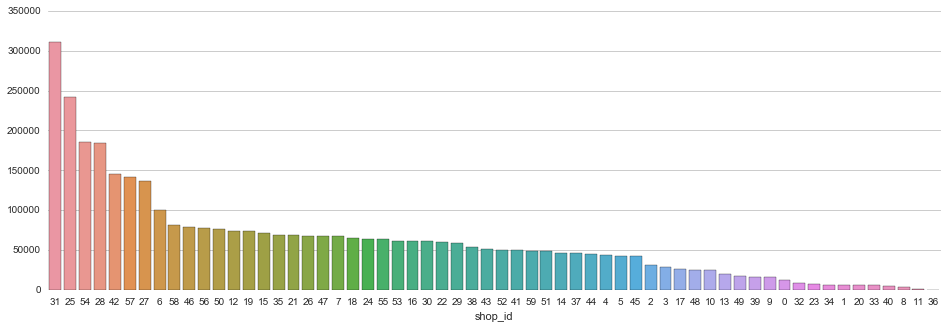

In [37]:
#Shop 판매량 순으로 정렬

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x =shop_sum_by_item_cnt.index, y =shop_sum_by_item_cnt.values, 
            order=shop_sum_by_item_cnt.sort_values(axis=0, ascending=False).index)
sns.despine(left=True, bottom=True)
plt.savefig("shop_sales.jpg")
plt.show()

## 월별 shop 판매량을 집계

In [38]:
month_sum = sales_train.groupby(by = ['date_block_num','shop_id'])['item_cnt_day'].sum()
month_sum = pd.DataFrame(month_sum).reset_index()
month_sum.head()

,date_block_num,shop_id,item_cnt_day
0,0,0,5578.0
1,0,1,2947.0
2,0,2,1146.0
3,0,3,767.0
4,0,4,2114.0


### shop 월별 판매량 분포를 boxplot으로 분석해본다.

  - x축 정렬 순서는 shop 판매량 순이다.
  - 거의 모든 shop이 꾸준한 판매량으로 보인다.

### shop별 판매추이에서는 12월에 급등하는 계절성이 보인다.

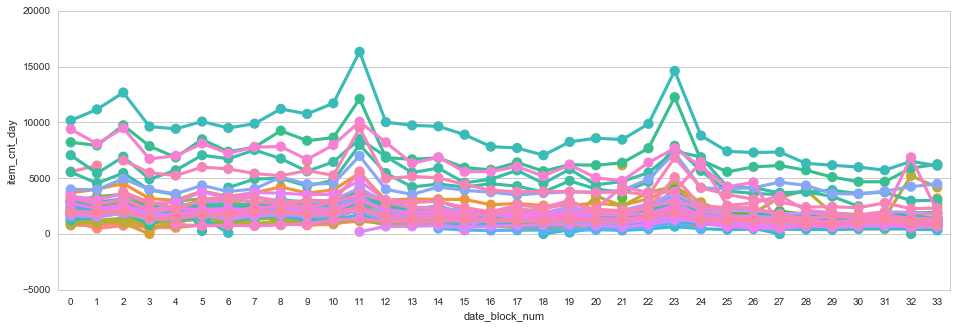

In [39]:
#월별 각 shop의 판매수량 추이

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 5))

sns.pointplot(x = 'date_block_num', y = 'item_cnt_day', hue = 'shop_id', data = month_sum)

ax.legend_.remove()
plt.savefig("shop_sales.jpg")
plt.show()

## 제품 카테고리별로 판매량을 파악한다.

In [40]:
#카테고리별 판매량 합게
cat_sum_by_item_cnt = sales_train.groupby(by = 'item_category_name_eng')['item_cnt_day'].sum()

#판매량별로 별도로 list로 순위저장, 챠트에 쓸려고...
item_cat_order_by_cnt_day = cat_sum_by_item_cnt.sort_values(axis=0, ascending=False).index.tolist()


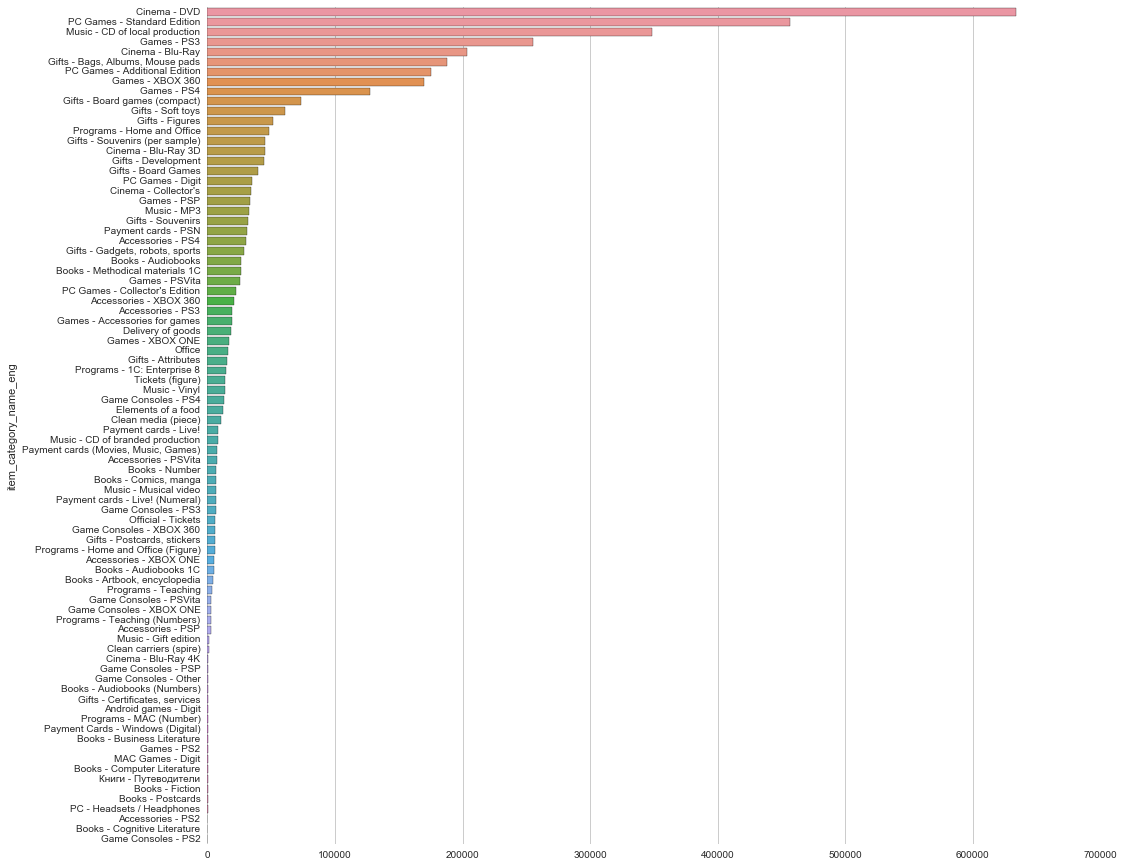

In [41]:
#item 카테고리별 판매량 순으로 정렬

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 15))

sns.barplot(y =cat_sum_by_item_cnt.index, x =cat_sum_by_item_cnt.values, 
            order=cat_sum_by_item_cnt.sort_values(axis=0, ascending=False).index)
sns.despine(left=True, bottom=True)
plt.savefig("cate.jpg")
plt.show()

# 아이템 가격은 영향이 클까?

In [42]:
t1 = sales_train.groupby(['item_price'], as_index=False)['item_cnt_day'].sum()

# outlier는 날려버리고...
t1 = t1[(t1.item_price > 0) & (t1.item_price < 300000)]

C:\Users\hanseo\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
C:\Users\hanseo\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in log


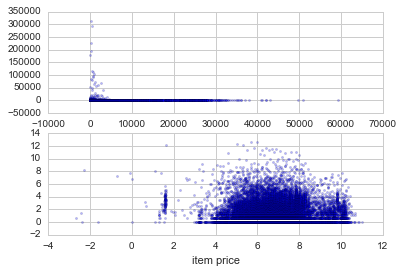

In [55]:
fig, ax = plt.subplots(2,1)
plt.subplot(2,1,1)
plt.scatter(x = t1['item_price'], y=t1['item_cnt_day'], s=5 ,alpha=0.3, cmap='viridis')

#log처리해서 줄여보자
plt.subplot(2,1,2)
plt.scatter(x = np.log(t1['item_price']), y=np.log(t1['item_cnt_day']), s = 5 ,alpha=0.3, cmap='viridis')
plt.xlabel('item price')

plt.savefig("price.jpg")
plt.show()

## 제품들은 판매시작일부터 어떤 추이를 갖게 되는가?

In [44]:
item_sell_day_cnt = sales_train.groupby(['item_id'], as_index = False)['item_cnt_day'].sum()

In [45]:
item_sell_day_cnt.sort_values('item_cnt_day', ascending=False).head(10)

,item_id,item_cnt_day
20602,20949,187642.0
2749,2808,17245.0
3654,3732,16642.0
17418,17717,15830.0
5717,5822,14515.0
3656,3734,11688.0
6543,6675,10289.0
3653,3731,10099.0
1814,1855,10032.0
16493,16787,9227.0


In [46]:
sales_train2 = sales_train.reset_index()

In [47]:
cat_sum_by_item_cnt2 = sales_train.groupby(['date_block_num','item_category_name_eng'],as_index=False)['item_cnt_day'].sum()

## 잘 팔리는 제품은 뭔가?

In [48]:
def charting_item(item_i):
    item_name = items[items.item_id == item_i]['item_name'].to_string()
    c_id = items[items.item_id == item_i]['item_category_id'].values
    tmp = sales_train.loc[sales_train.item_id == item_i]['item_cnt_day']
    tmp_sum = tmp.groupby(tmp.index).sum()
    tmp_sum = tmp_sum.resample('M').sum()
    
    print("제품명 : " , translator.translate(item_name).text)
    print('카테고리 : ', item_categories[item_categories.item_category_id == 30]['item_category_name_eng'])    
    
    f, ax = plt.subplots(figsize=(16, 5))

    gg = sns.pointplot(x = tmp_sum.index, y = tmp_sum.values)
    
    loc, labels = plt.xticks()
    gg.set_xticklabels(labels, rotation=45)
    gg.plot()

제품명 :  20949 Corporate package T-shirt 1C Interest white (34 * 42) ...
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


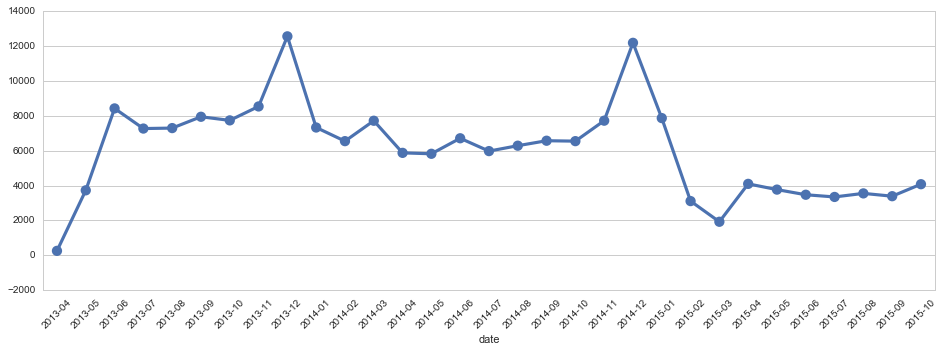

In [49]:
charting_item(20949)

제품명 :  3732 Grand Theft Auto V [PS3, Russian subtitles]
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


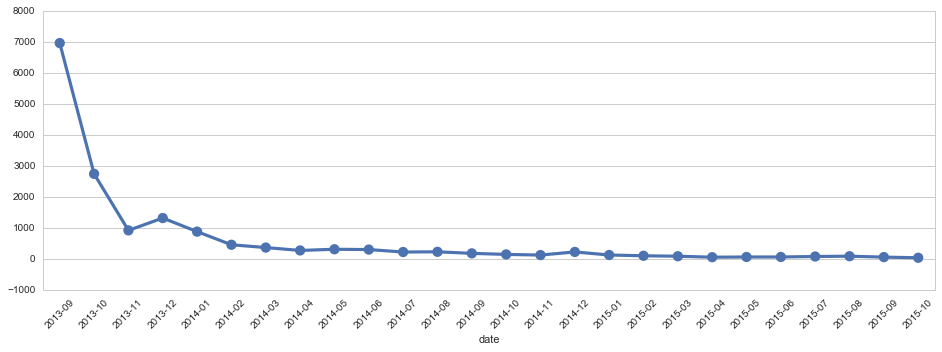

In [50]:
charting_item(3732)

제품명 :  2808 Diablo III [PC, Jewel, Russian version]
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


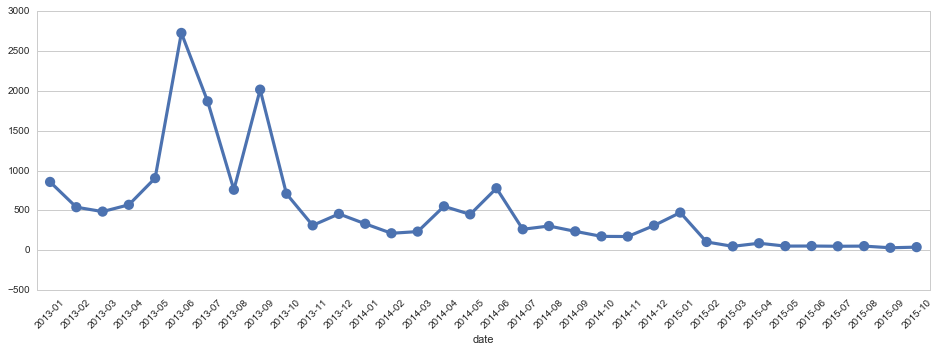

In [51]:
charting_item(2808)

제품명 :  5822 Playstation Store wallet replenishment: Card ...
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


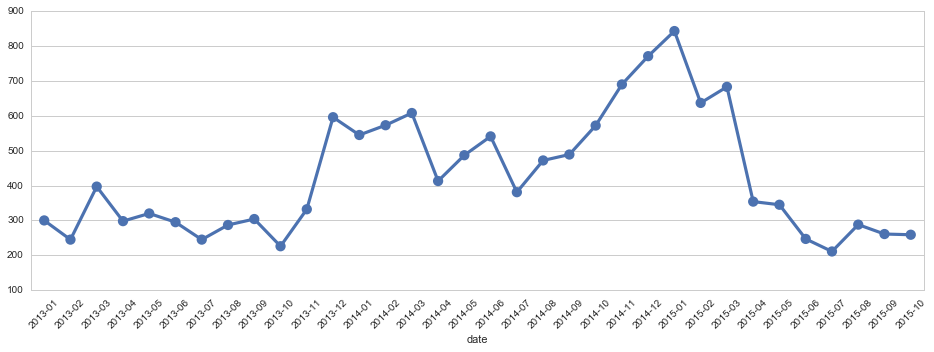

In [52]:
charting_item(5822)

제품명 :  6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


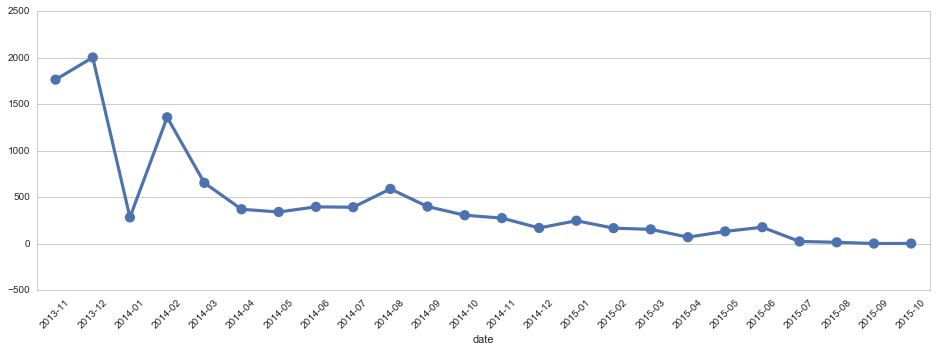

In [53]:
charting_item(6675)

제품명 :  1855 Battlefield 4 [PC, Russian version]
카테고리 :  30    PC Games - Standard Edition
Name: item_category_name_eng, dtype: object


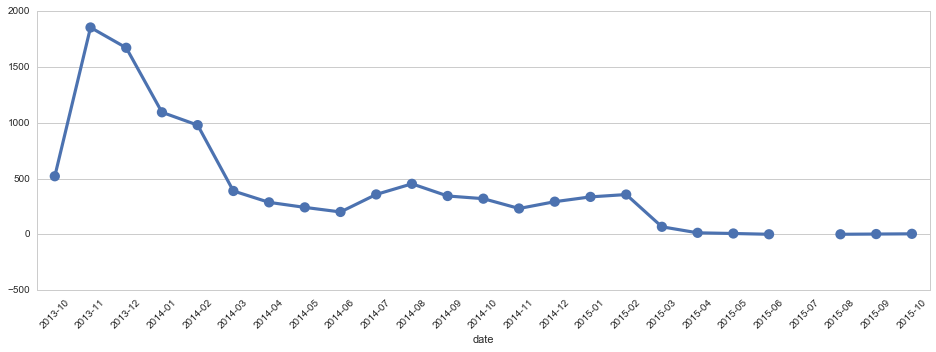

In [54]:
charting_item(1855)